In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arslanr369/bitcoin-price-2014-2023")

print("Path to dataset files:", path)

100%|██████████| 91.5k/91.5k [00:00<00:00, 186kB/s]

Extracting files...
Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\arslanr369\bitcoin-price-2014-2023\versions\1


In [3]:
dataset = pd.read_csv('BTC-USD.csv')

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


In [6]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10
std,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

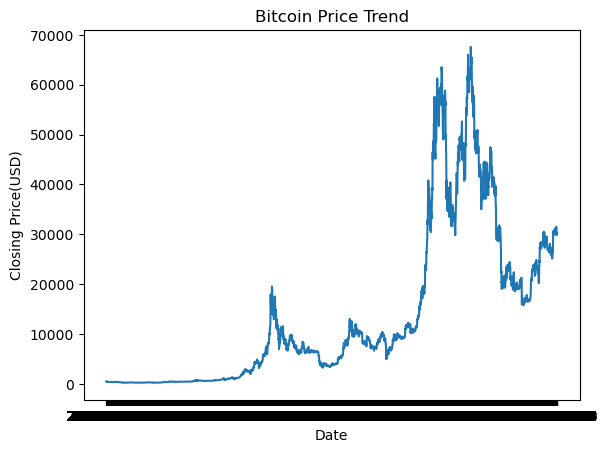

In [13]:
plt.plot(dataset['Date'], dataset['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price(USD)')
plt.title('Bitcoin Price Trend')
# plt.xticks(rotation=45)
plt.show()

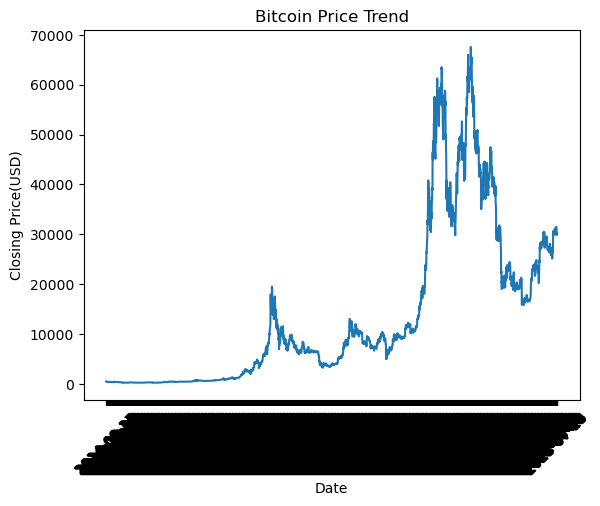

In [14]:
plt.plot(dataset['Date'], dataset['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price(USD)')
plt.title('Bitcoin Price Trend')
plt.xticks(rotation=45)
plt.show()

In [16]:
dataset['7_day_ma'] = dataset['Close'].rolling(window=7).mean()
dataset['Daily_Return'] = dataset['Close'].pct_change()
dataset['Price_Movement'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)

In [17]:
dataset = dataset.dropna()

In [22]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', '7_day_ma', 'Daily_Return']
X = dataset[features]
y_class = dataset['Price_Movement']
y_reg = dataset['Close']
X

,Open,High,Low,Close,Volume,7_day_ma,Daily_Return
6,402.092010,441.557007,396.196991,435.790985,45099500,417.462572,0.083647
7,435.751007,436.112000,421.131989,423.204987,30627700,412.586997,-0.028881
8,423.156006,423.519989,409.467987,411.574005,26814400,410.748997,-0.027483
9,411.428986,414.937988,400.009003,404.424988,21460800,412.124568,-0.017370
10,403.556000,406.622986,397.372009,399.519989,15029300,410.783997,-0.012128
...,...,...,...,...,...,...,...
3223,30331.783203,30407.781250,30263.462891,30295.806641,8011667756,30529.175223,-0.001261
3224,30297.472656,30437.560547,30089.669922,30249.132813,8516564470,30540.303571,-0.001541
3225,30249.626953,30336.400391,29685.783203,30145.888672,13240156074,30501.934710,-0.003413
3226,30147.070313,30233.656250,29556.427734,29856.562500,13138897269,30392.736328,-0.009598


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [21]:
X

array([[ 4.02092010e+02,  4.41557007e+02,  3.96196991e+02, ...,
         4.50995000e+07,  4.17462572e+02,  8.36474177e-02],
       [ 4.35751007e+02,  4.36112000e+02,  4.21131989e+02, ...,
         3.06277000e+07,  4.12586997e+02, -2.88808131e-02],
       [ 4.23156006e+02,  4.23519989e+02,  4.09467987e+02, ...,
         2.68144000e+07,  4.10748997e+02, -2.74830930e-02],
       ...,
       [ 3.02496270e+04,  3.03364004e+04,  2.96857832e+04, ...,
         1.32401561e+10,  3.05019347e+04, -3.41312730e-03],
       [ 3.01470703e+04,  3.02336562e+04,  2.95564277e+04, ...,
         1.31388973e+10,  3.03927363e+04, -9.59753335e-03],
       [ 2.99190645e+04,  3.02241152e+04,  2.99182812e+04, ...,
         1.19066409e+10,  3.03639157e+04,  1.11647094e-02]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_class, y_test_class = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

In [26]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
clf.fit(X_train, y_train_class)
y_pred_class = clf.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test_class, y_pred_class): .2f}")
print(f"F1-Score: {f1_score(y_test_class, y_pred_class): .2f}")

Classification Accuracy:  0.56
F1-Score:  0.68


In [34]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [35]:
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
print(f"Regression MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")

Regression MSE: 2987.33


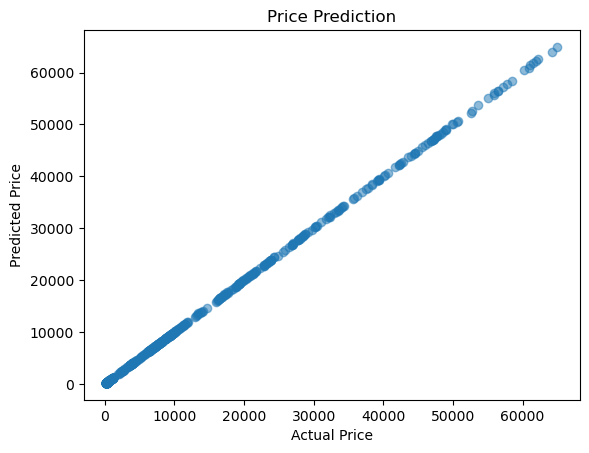

In [36]:
plt.scatter(y_test_reg, y_pred_reg, alpha = 0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Prediction')
plt.show()

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

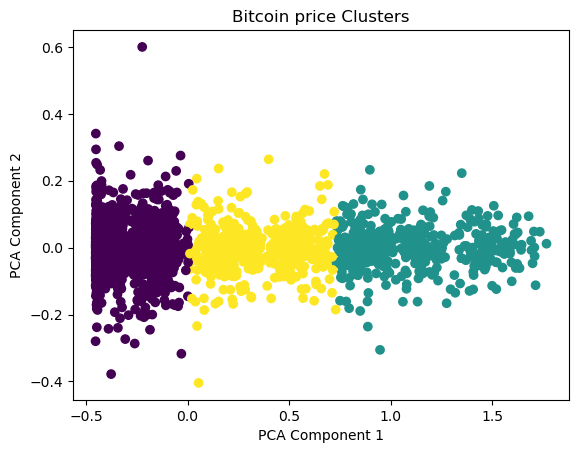

In [41]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap = 'viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Bitcoin price Clusters')
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_scaled, y_class, cv = 5)
print(f"Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores): .2f}")

Cross-Validation Accuracy: 0.51 ±  0.03


In [45]:
importances = reg.feature_importances_

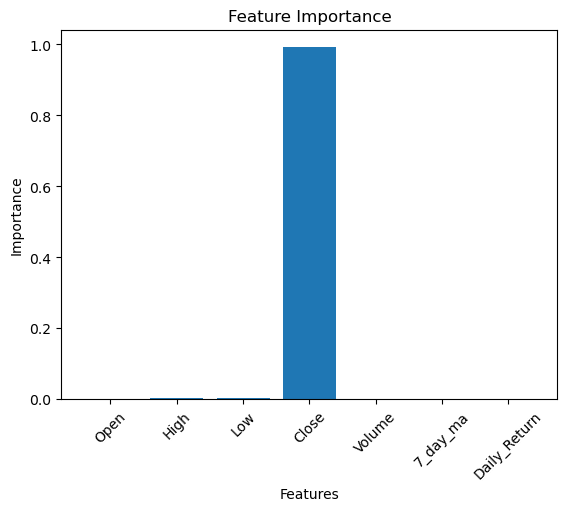

In [46]:
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()